In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.extend(['c:/PycharmProjects/finance/src/'])
sys.path.extend(['c:/PycharmProjects/finance/'])
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, expected_returns, Plotting
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import datetime
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, objective_functions
import quantstats as qs
from src.port_cross_val import *
from src.metrics import extend_pandas_custom
from configs import COMPANIES_LIST, start_date, end_date
from utils import smartDataReader,get_last_raw,deal_with_add_constraints,prepare_FX,get_mean
pd.set_option("display.max_columns", 101)
pypfopt.__version__
import yfinance as yf
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 100000})
qs.extend_pandas()
extend_pandas_custom()

## Portfolio backtesting
Make cross-validated estimate of sharpe ratio and other performance metrics

In [2]:
prices=prepare_FX()
prices=prices.groupby(pd.Grouper(key = None, freq = 'W')).apply(get_mean)
prices.head(3)

,FXCN,FXGD,FXIT,FXMM,FXRB,FXRL,FXRU,FXTB,FXUS
date,,,,,,,,,
2013-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
autodetect_frequency(prices)
prices=prices.dropna(axis=0)
# prices

7


In [4]:
portfolio_optimizer=OptPortfolio(target_function="efficient_risk",
                                 target_function_params={"target_volatility":0.08},
                                 budget=100000)
cv=FinancialCrossValidation(n_splits=5)
cv.validate(prices,portfolio_optimizer)

(9, 9)
7
Period end: 2019-04-14 00:00:00
Leftover: $352.14
Alloc: ${'FXGD': 32.0, 'FXIT': 1.0, 'FXMM': 7.0, 'FXRB': 11.0, 'FXRL': 11.0, 'FXRU': 11.0, 'FXTB': 4.0, 'FXUS': 2.0}
Period end: 2019-07-07 00:00:00
Leftover: $182.86
Alloc: ${'FXGD': 28.0, 'FXIT': 1.0, 'FXMM': 7.0, 'FXRB': 10.0, 'FXRL': 11.0, 'FXRU': 11.0, 'FXTB': 4.0, 'FXUS': 2.0}
(9, 9)
7
Period end: 2019-04-14 00:00:00
Leftover: $187.28
Alloc: ${'FXGD': 40.0, 'FXIT': 2.0, 'FXMM': 4.0, 'FXRB': 7.0, 'FXRL': 6.0, 'FXRU': 16.0, 'FXTB': 12.0, 'FXUS': 2.0}
Period end: 2019-09-08 00:00:00
Leftover: $123.04
Alloc: ${'FXGD': 42.0, 'FXIT': 2.0, 'FXMM': 4.0, 'FXRB': 8.0, 'FXRL': 5.0, 'FXRU': 16.0, 'FXTB': 13.0, 'FXUS': 2.0}
(9, 9)
7
Period end: 2019-04-14 00:00:00
Leftover: $373.56
Alloc: ${'FXGD': 26.0, 'FXIT': 2.0, 'FXMM': 6.0, 'FXRB': 8.0, 'FXRL': 8.0, 'FXRU': 13.0, 'FXTB': 9.0, 'FXUS': 3.0}
Period end: 2019-11-10 00:00:00
Leftover: $590.25
Alloc: ${'FXGD': 27.0, 'FXIT': 2.0, 'FXMM': 6.0, 'FXRB': 7.0, 'FXRL': 7.0, 'FXRU': 14.0, 'FX

c:\python_venvs\finance\lib\site-packages\quantstats\stats.py:376: RuntimeWarning: Mean of empty slice.
  c_var = returns[returns < var].values.mean()
c:\python_venvs\finance\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Period end: 2019-04-14 00:00:00
Leftover: $81.70
Alloc: ${'FXCN': 2.0, 'FXGD': 21.0, 'FXIT': 3.0, 'FXMM': 5.0, 'FXRB': 7.0, 'FXRL': 7.0, 'FXRU': 10.0, 'FXTB': 7.0, 'FXUS': 3.0}
Period end: 2020-01-12 00:00:00
Leftover: $24.20
Alloc: ${'FXCN': 2.0, 'FXGD': 18.0, 'FXIT': 2.0, 'FXMM': 6.0, 'FXRB': 8.0, 'FXRL': 8.0, 'FXRU': 10.0, 'FXTB': 6.0, 'FXUS': 3.0}
(9, 9)
7
Period end: 2019-04-14 00:00:00
Leftover: $170.84
Alloc: ${'FXCN': 2.0, 'FXGD': 25.0, 'FXIT': 3.0, 'FXMM': 5.0, 'FXRB': 6.0, 'FXRL': 4.0, 'FXRU': 12.0, 'FXTB': 11.0, 'FXUS': 3.0}
Period end: 2020-03-15 00:00:00
Leftover: $772.20
Alloc: ${'FXCN': 2.0, 'FXGD': 22.0, 'FXIT': 2.0, 'FXMM': 5.0, 'FXRB': 6.0, 'FXRL': 5.0, 'FXRU': 11.0, 'FXTB': 10.0, 'FXUS': 3.0}


In [5]:
pd.DataFrame(cv.calc_allocations_test).describe().round(1)
# pd.DataFrame(cv.calc_allocations_test).median()

,FXGD,FXIT,FXMM,FXRB,FXRL,FXRU,FXTB,FXUS,FXCN
count,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0
mean,27.4,1.8,5.6,7.8,7.2,12.4,8.6,2.6,2.0
std,9.1,0.4,1.1,1.5,2.5,2.5,3.6,0.5,0.0
min,18.0,1.0,4.0,6.0,5.0,10.0,4.0,2.0,2.0
25%,22.0,2.0,5.0,7.0,5.0,11.0,6.0,2.0,2.0
50%,27.0,2.0,6.0,8.0,7.0,11.0,10.0,3.0,2.0
75%,28.0,2.0,6.0,8.0,8.0,14.0,10.0,3.0,2.0
max,42.0,2.0,7.0,10.0,11.0,16.0,13.0,3.0,2.0


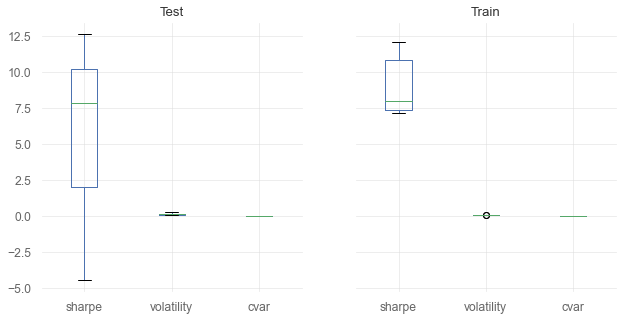

In [6]:
Visualizer.draw_comparing_boxplots(cv)
# pd.DataFrame(cv.metrics_train['sharpe']).plot()

## Portfolio

In [7]:
# prices=prices.iloc[:-18,:]
prices.tail(3)

,FXCN,FXGD,FXIT,FXMM,FXRB,FXRL,FXRU,FXTB,FXUS
date,,,,,,,,,
2020-04-26,3052.800000,882.560000,6410.000000,1609.140,1684.800000,2592.9,907.760,769.500000,3792.600000
2020-05-03,3056.000000,867.200000,6535.000000,1611.225,1697.500000,2663.5,898.075,754.675000,3855.000000
2020-05-10,2975.333333,869.333333,6692.333333,1615.100,1700.333333,2682.5,904.800,761.833333,3835.333333


7
Period end: 2019-04-14 00:00:00
Leftover: $0.03
Alloc: ${'FXCN': 2.0, 'FXGD': 24.0, 'FXIT': 3.0, 'FXMM': 4.0, 'FXRB': 5.0, 'FXRL': 3.0, 'FXRU': 13.0, 'FXTB': 14.0, 'FXUS': 2.0}
7
Period end: 2019-04-14 00:00:00
Leftover: $622.93
Alloc: ${'FXCN': 2.0, 'FXGD': 31.0, 'FXIT': 3.0, 'FXMM': 2.0, 'FXRB': 4.0, 'FXRL': 2.0, 'FXRU': 14.0, 'FXTB': 14.0, 'FXUS': 2.0}


c:\python_venvs\finance\lib\site-packages\pypfopt\efficient_frontier.py:183: UserWarning: max_sharpe transforms the optimisation problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimisation problem so additional objectives may not work as expected."


Text(0.5, 1.0, 'Bench')

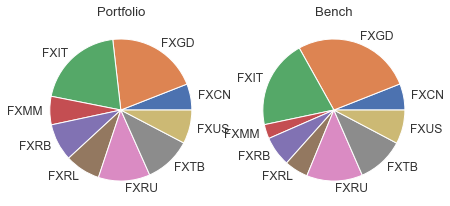

In [8]:

portfolio_optimizer=OptPortfolio(target_function="efficient_risk",target_function_params={"target_volatility":0.30},budget=100000)
# portfolio_optimizer=OptPortfolio(target_function="max_sharpe",budget=100000)
portfolio_optimizer.fit(prices.dropna(axis=0))
portfolio=portfolio_optimizer.predict(prices)

# benchmark=OptPortfolio(target_function="efficient_risk",target_function_params={"target_volatility":0.11},budget=100000)
benchmark=OptPortfolio(target_function="max_sharpe",budget=100000)
benchmark.fit(prices.dropna(axis=0))
portfolio_benchmark=benchmark.predict(prices)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7,7))
axs[0].pie(portfolio.iloc[-1], labels=portfolio.columns)
axs[0].set_title("Portfolio")
axs[1].pie(portfolio_benchmark.iloc[-1], labels=portfolio_benchmark.columns)
axs[1].set_title("Bench")

In [9]:
# portfolio.iloc[-1]
portfolio_optimizer.allocate(prices.dropna(axis=0))
{k:v*portfolio_optimizer.alloc[k] for (k,v) in prices.iloc[-1,:].items()}

Period end: 2019-04-14 00:00:00
Leftover: $0.03
Alloc: ${'FXCN': 2.0, 'FXGD': 24.0, 'FXIT': 3.0, 'FXMM': 4.0, 'FXRB': 5.0, 'FXRL': 3.0, 'FXRU': 13.0, 'FXTB': 14.0, 'FXUS': 2.0}


{'FXCN': 5950.666666666667,
 'FXGD': 20864.0,
 'FXIT': 20077.0,
 'FXMM': 6460.400000000001,
 'FXRB': 8501.666666666666,
 'FXRL': 8047.5,
 'FXRU': 11762.400000000001,
 'FXTB': 10665.666666666668,
 'FXUS': 7670.666666666667}

In [193]:
# dir(portfolio_optimizer.ef)

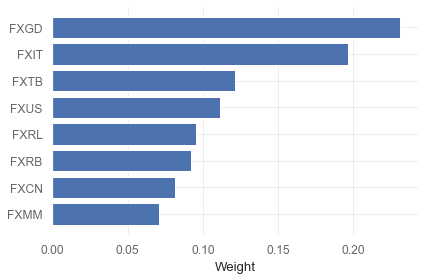

In [194]:
Visualizer.draw_weights(portfolio_optimizer)


In [195]:
# portfolio.sum(axis=1).sharpe(prices))
port_sum=portfolio.sum(axis=1)
port_sum.sharpe(rf=0.5)

port_bench_sum=portfolio_benchmark.sum(axis=1)
port_bench_sum.sharpe(rf=0.5)
# port_sum.periods

7
7


3.278361038646152

In [196]:
# portfolio

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2019-04-14  2019-04-14
End Period                 2020-05-10  2020-05-10
Risk-Free Rate             0.0%        0.0%
Time in Market             99.0%       99.0%

Cumulative Return          23.78%      28.37%
CAGR%                      21.98%      26.18%
Sharpe                     6.84        7.22
Sortino                    14.85       16.55
Max Drawdown               -2.71%      -2.91%
Longest DD Days            77          105
Volatility (ann.)          13.96%      15.5%
R^2                        0.98        0.98
Calmar                     8.12        9.0
Skew                       1.07        1.4
Kurtosis                   5.92        7.84

Expected Daily %           0.38%       0.44%
Expected Monthly %         1.54%       1.8%
Expected Yearly %          11.26%      13.3%
Kelly Criterion            52.75%      54.7%
Risk of Ruin               0.0%        0.

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-05-12,2019-05-26,2019-06-30,49,-2.707876,-2.647232
2,2019-09-15,2019-09-29,2019-12-01,77,-2.575483,-2.424144
3,2020-03-01,2020-03-22,2020-03-29,28,-2.253251,-1.629066
4,2019-12-08,2019-12-08,2019-12-29,21,-0.503196,-0.387074
5,2019-04-21,2019-04-21,2019-04-28,7,-0.382532,0.000000


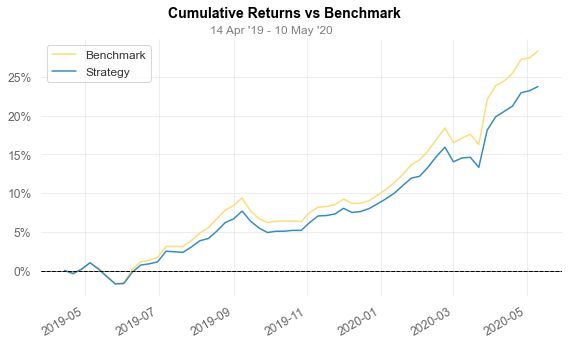

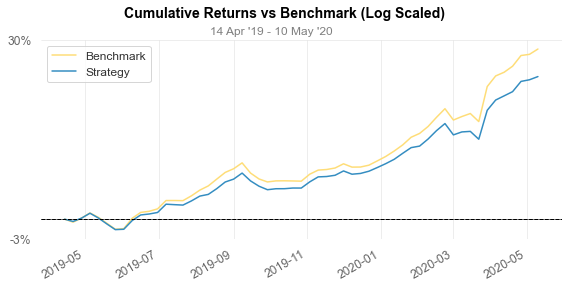

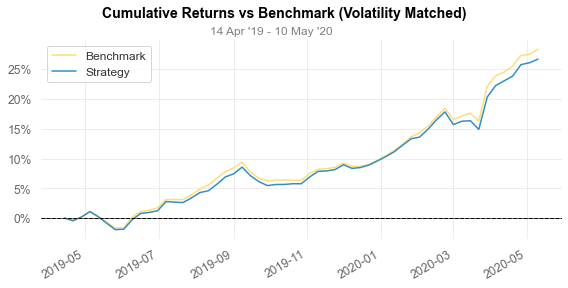

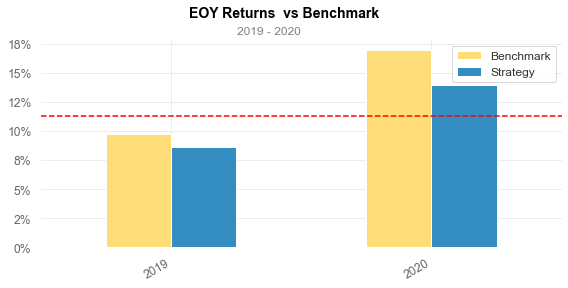

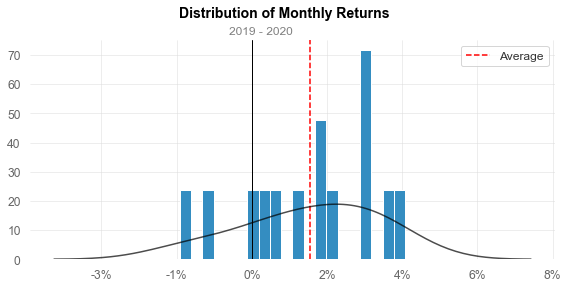

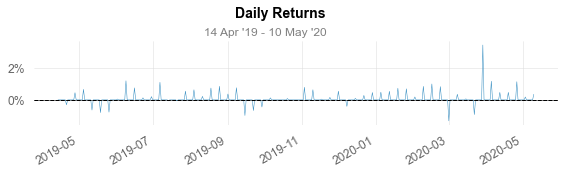

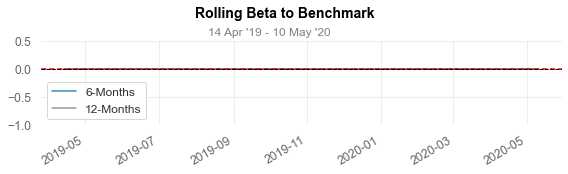

IndexError: index 0 is out of bounds for axis 0 with size 0

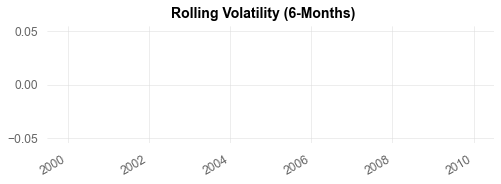

In [197]:
# port_sum.plot_snapshot()
# port_sum.plot_rolling_sharpe()
qs.reports.full(port_sum,benchmark=port_bench_sum)

In [112]:
# portfolio
# portfolio.sum(axis=1)

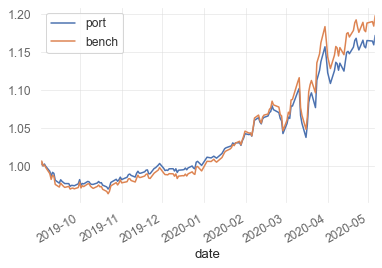

In [35]:
compare_df=pd.concat([portfolio.sum(axis=1),portfolio_benchmark.sum(axis=1)],axis=1)
compare_df=compare_df.iloc[100:,:]
compare_df.columns=['port','bench']
compare_df=compare_df/compare_df.iloc[0,:]
compare_df.plot()
# compare_df[0]
# compare_df
# compare_df